This dataset contains the chemical fingerprint of different samples of glass belonging to different classes. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence. If it is correctly identified! Attribute Information: • Id number: 1 to 214 • RI: refractive index • Na: Sodium • Mg: Magnesium • Al: Aluminum • Si: Silicon • K: Potassium • Ca: Calcium • Ba: Barium • Fe: Iron • Type of glass: (class attribute) 1. building windows float processed 2. building windows non float processed 3. vehicle windows float processed 4. vehicle windows non float processed (none in this database) 5. containers 6. tableware 7. headlamps

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('glass.csv', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type'])
data.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


1. Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many
samples belong to the two groups?

In [27]:
data_filtered = data[np.logical_or(data['Type'] == 1, data['Type'] == 7)]
data_type1_len, _ = data[data['Type'] == 1].shape
data_type7_len, _ = data[data['Type'] == 7].shape

print(data_type1_len)
print(data_type7_len)
data_filtered = data_filtered.drop(columns=['Type'])


70
29


In [28]:
data_filtered = data_filtered.drop(columns=['Id'])
data_filtered_mean = np.mean(data_filtered, axis=0) #axis 0 mean by columns (in this case features), axis 1 by rows
data_std = data_filtered.std()
data_normalized = (data_filtered - data_filtered_mean) / data_std

data_normalized.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.126268,0.059169,1.200193,-0.628449,-1.322348,-0.870066,0.058524,-0.528456,-0.560214
1,-0.260656,0.378917,0.613448,-0.154488,0.013063,0.169214,-1.213640,-0.528456,-0.560214
2,-0.843980,-0.081519,0.580485,0.173638,0.378544,-0.053489,-1.282779,-0.528456,-0.560214
3,-0.240260,-0.490796,0.672782,-0.282093,-0.155620,0.391917,-0.674353,-0.528456,-0.560214
4,-0.338161,-0.414057,0.626633,-0.373240,0.505056,0.342428,-0.881771,-0.528456,-0.560214


3. Perform PCA on the dataset (do not consider the ”Id” as a feature!) by means of the SVD decomposition.

In [31]:
data_normalized_np = data_normalized.to_numpy()

U,s,VT = np.linalg.svd(data_normalized_np, full_matrices=False)
s

array([18.52290175, 15.43665377, 10.86507792,  8.7875981 ,  6.78304215,
        5.75797462,  4.0583548 ,  3.09694198,  0.33883145])

Text(0.5, 1.0, 'explained variance')

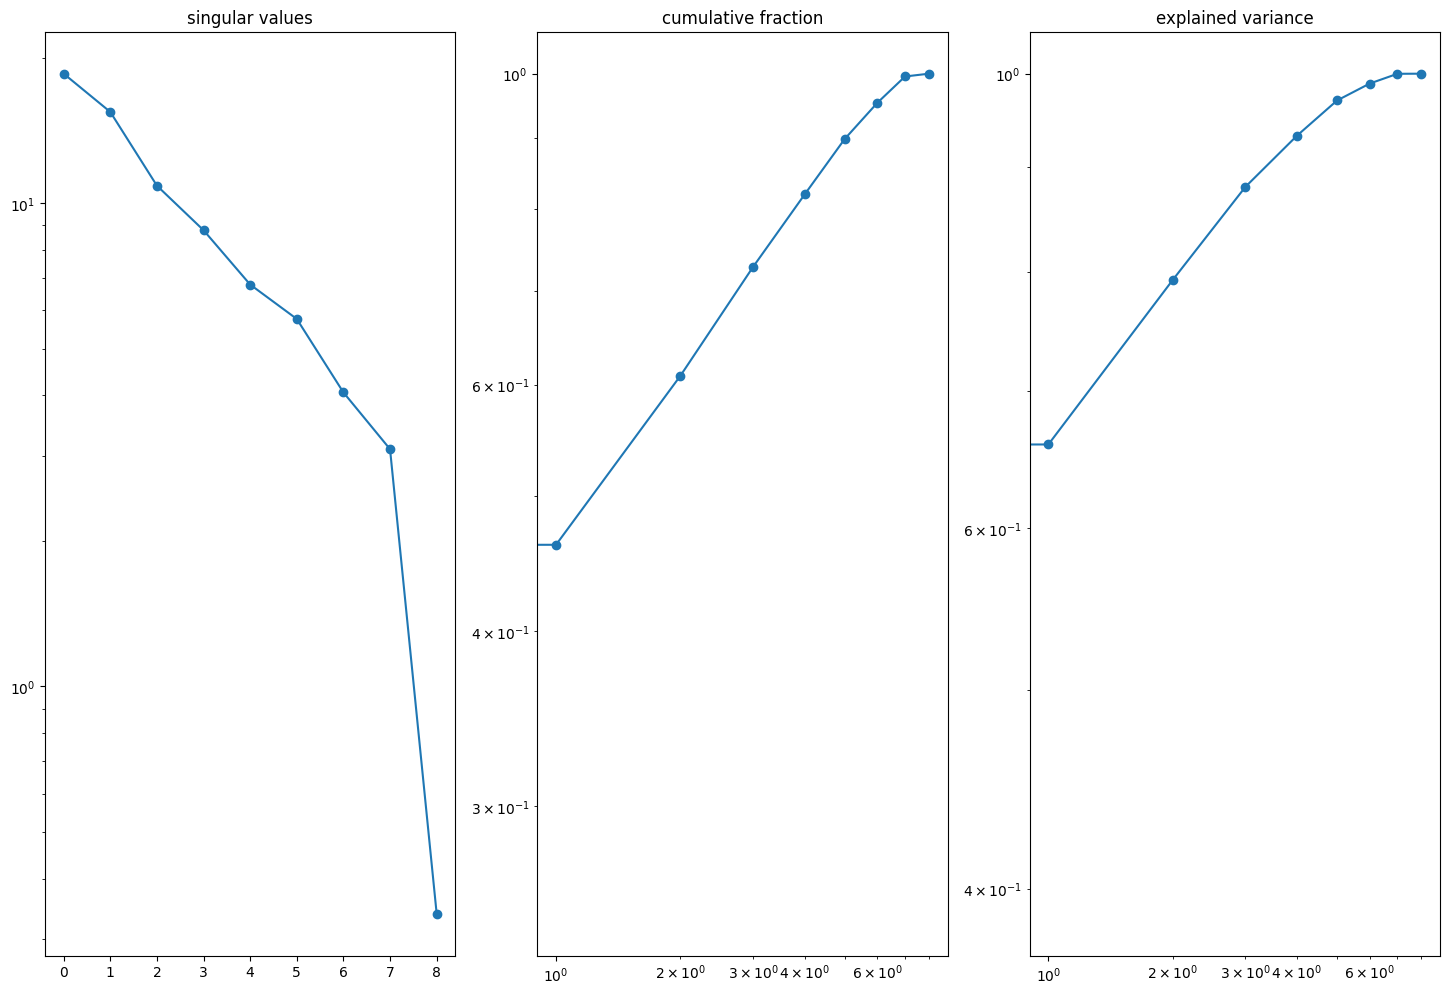

In [36]:
fig, axs = plt.subplots(1,3, figsize = (18,12))
axs = axs.flatten()

axs[0].semilogy(s, 'o-')
axs[0].set_title('singular values')

axs[1].loglog(np.cumsum(s)/np.sum(s), 'o-')
axs[1].set_title('cumulative fraction')

axs[2].loglog(np.cumsum(s**2)/np.sum(s**2), 'o-')
axs[2].set_title('explained variance')

In [35]:
Z = np.dot(VT.T, np.diag(s))
Z

array([[-6.10575999e+00,  6.52592126e+00, -1.58636282e+00,
         7.53428808e-01,  3.13921387e+00, -4.25288128e-01,
        -1.15747035e+00,  1.91639442e+00,  2.40688841e-03],
       [ 6.01635664e+00,  6.94292277e+00, -1.62710618e+00,
         1.39899335e+00, -1.12961460e+00,  2.27198838e-01,
         2.66118964e+00,  7.55389220e-01, -1.20115059e-01],
       [-8.99426705e+00, -1.97197933e+00, -2.16073522e+00,
         4.06834880e-01, -2.73204533e+00, -4.35297795e-01,
        -8.16502093e-01, -5.31008188e-02, -2.38987786e-01],
       [ 8.80056996e+00, -1.36069527e-01,  1.56983573e+00,
        -1.21239788e-01, -6.78657684e-01,  3.65401850e+00,
        -1.93103487e+00,  7.09924938e-01, -8.39859019e-02],
       [ 4.58814057e+00, -6.44118642e+00,  4.03259454e+00,
        -2.98741404e+00,  1.36966071e+00, -2.60518139e+00,
         3.60481306e-01,  1.21190523e+00, -1.09638328e-01],
       [-1.40583073e+00, -7.40118985e+00, -4.45358922e+00,
         6.65559876e-01,  3.77493943e+00,  2.298496